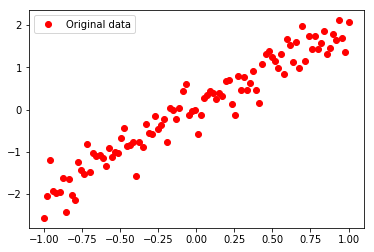

Epoch: 1 cost= 0.5600179 W= [0.9262886] b= [0.3265113]
Epoch: 3 cost= 0.14183554 W= [1.6621153] b= [0.133461]
Epoch: 5 cost= 0.10291792 W= [1.8620944] b= [0.0582231]
Epoch: 7 cost= 0.09910906 W= [1.9139661] b= [0.03834285]
Epoch: 9 cost= 0.09855047 W= [1.9273812] b= [0.03319537]
Epoch: 11 cost= 0.09843456 W= [1.93085] b= [0.03186416]
Epoch: 13 cost= 0.09840652 W= [1.9317466] b= [0.03152009]
Epoch: 15 cost= 0.09839938 W= [1.9319788] b= [0.03143102]
Epoch: 17 cost= 0.09839756 W= [1.9320383] b= [0.03140816]
Epoch: 19 cost= 0.09839709 W= [1.9320537] b= [0.03140227]
 Finished!
cost= 0.098396994 W= [1.9320567] b= [0.03140117]


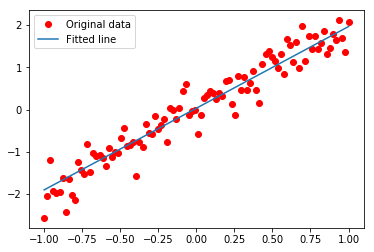

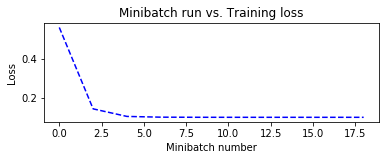

x=0.2，z= [0.4178125]


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


plotdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]


#生成模拟数据
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x，但是加入了噪声
#显示模拟数据点
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()




# 创建模型
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

# 前向结构
z = tf.multiply(X, W)+ b

#反向优化
cost =tf.reduce_mean( tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# 初始化变量
init = tf.global_variables_initializer()
# 训练参数
training_epochs = 20
display_step = 2

# 启动session
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA" ):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)

    print (" Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))
    #print ("cost:",cost.eval({X: train_X, Y: train_Y}))

    #图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
     
    plt.show()

    print ("x=0.2，z=", sess.run(z, feed_dict={X: 0.2}))
    
